# Time Series Forecasting

Time Series data is an experimental data which has been observed at different points in time (usually evenly spaced, like once a day or once an hour or once a minute). For example, the data of airline ticket sales per day is a time series. However, just because a series of events has a time element does not automatically make it a time series, such as the dates of major airline disasters, which are randomly spaced and are not time series. These types of random processes are known as point process.

Time Series have several key features such as trend, seasonality, and noise.Forecasting is the process of making predictions of the future, based on past and present data.

Here in this kernel, we attempt to perform Time Series Analysis on the Historic Bitcoin Price data. We can easily see from the Data Exploration section, that the Bitcoin prices were quite volatile and inconsistent over the years. Its very hard to perform Time series analysis on such volatile data. But here we try to explore the different Time series forecasting models. All the models used in this Kernel are very basic, there is scope of more complex and better performing models.

1. Time Series forecasting with LSTM
2. Time Series forecasting with XGBoost
3. Time Series forecasting with Facebook Prophet
4. Time Series forecasting with ARIMA

## We will be working on CIPLA Stocks

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
import yfinance
import warnings
warnings.filterwarnings('ignore')

In [2]:
CIPLA_data=yfinance.download('CIPLA.BO')

[*********************100%***********************]  1 of 1 completed


In [3]:
CIPLA_data.head()

Open        High         Low       Close  Adj Close  Volume
Date                                                                         
2000-01-03  108.399994  108.399994  108.399994  108.399994  64.869507       0
2000-01-04  108.399994  108.399994  108.399994  108.399994  64.869507       0
2000-01-05  108.399994  108.399994  108.399994  108.399994  64.869507       0
2000-01-06  108.399994  108.399994  108.399994  108.399994  64.869507       0
2000-01-07  108.399994  108.399994  108.399994  108.399994  64.869507       0

Now that our data has been converted into the desired format, let’s take a look at its various columns for further analysis.

1. The Open and Close columns indicate the opening and closing price on a particular day.
2. The High and Low columns provide the highest and the lowest price on a particular day, respectively.
3. The Volume column tells us the total volume of traded on a particular day.
4. The Weighted price is a trading benchmark used by traders that gives the weighted price a security has traded at throughout the day, based on both volume and price. It is important because it provides traders with insight into both the trend and value of a security. To read more about how Weighted price is calculated, click here.

In [4]:
CIPLA_data.tail()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2023-08-07  1190.050049  1228.250000  1175.099976  1223.550049  1223.550049   
2023-08-08  1223.550049  1269.000000  1223.550049  1266.599976  1266.599976   
2023-08-09  1268.050049  1271.900024  1251.949951  1265.900024  1265.900024   
2023-08-10  1265.900024  1277.550049  1248.150024  1258.800049  1258.800049   
2023-08-11  1260.000000  1260.000000  1244.800049  1250.699951  1250.699951   

            Volume  
Date                
2023-08-07  108762  
2023-08-08  232414  
2023-08-09   61353  
2023-08-10   55531  
2023-08-11   23043

In [5]:
CIPLA_data.shape

(5873, 6)

In [6]:
CIPLA_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5873 entries, 2000-01-03 to 2023-08-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5873 non-null   float64
 1   High       5873 non-null   float64
 2   Low        5873 non-null   float64
 3   Close      5873 non-null   float64
 4   Adj Close  5873 non-null   float64
 5   Volume     5873 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 321.2 KB


In [7]:
CIPLA_data.describe()

Open         High          Low        Close    Adj Close  \
count  5873.000000  5873.000000  5873.000000  5873.000000  5873.000000   
mean    392.005574   396.600809   386.727468   391.279138   378.310286   
std     278.242203   281.504914   274.945350   278.029860   283.046548   
min      50.507996    50.507996    44.888000    50.183994    37.201565   
25%     140.000000   140.979996   137.399994   139.300003   127.712875   
50%     329.000000   332.950012   325.149994   328.899994   316.108398   
75%     578.250000   585.000000   571.099976   577.299988   570.273376   
max    1268.050049  1277.550049  1251.949951  1266.599976  1266.599976   

             Volume  
count  5.873000e+03  
mean   2.948121e+05  
std    5.223704e+05  
min    0.000000e+00  
25%    7.539900e+04  
50%    1.535070e+05  
75%    3.257270e+05  
max    2.121542e+07

# Visualizing the Time Series Data

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

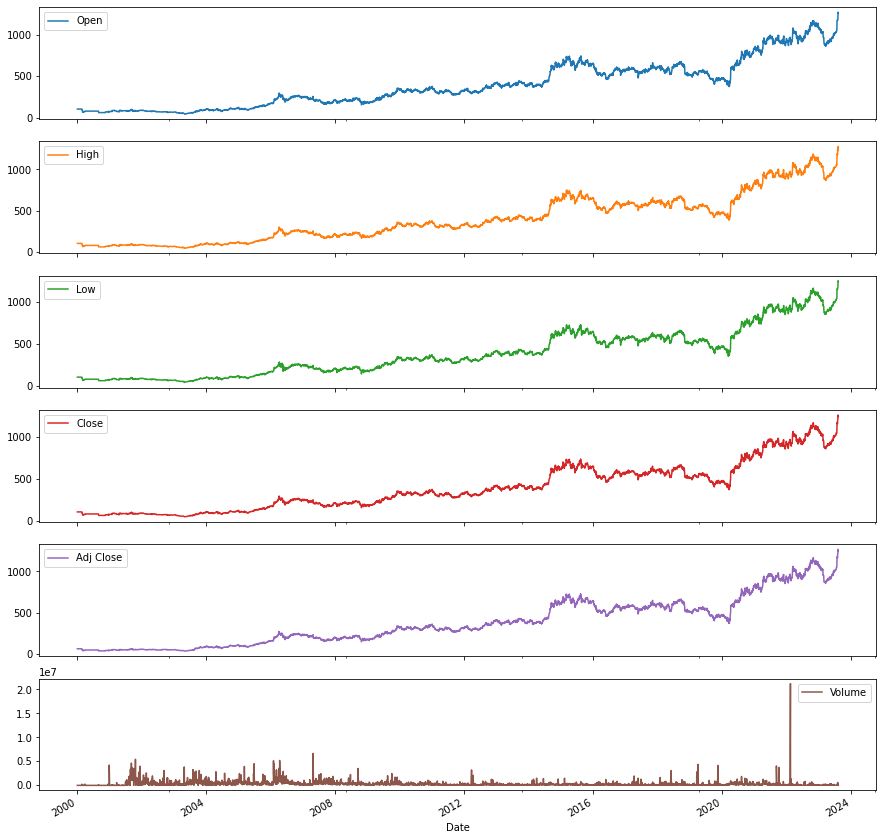

In [14]:
## Visualizing the data
CIPLA_data.plot(subplots=True,figsize=(15,16))

# Plotting using Plotly

Simple CandleStick Plot

In [15]:
#ignoring the volumne column(as it contains very different values)
import plotly.graph_objects as go
candlestick=go.Candlestick(x=CIPLA_data.index,open=CIPLA_data['Open'],
                     close=CIPLA_data['Close'],
                     high=CIPLA_data['High'],
                     low=CIPLA_data['Low']
                     )
fig = go.Figure(data=[candlestick])
fig.update_layout(
    width       = 900,
    height      = 450,
    title       = dict(text='<b>CIPLA Chart</b>', font=dict(size=30)),
    yaxis_title = dict(text='Price (₹)', font=dict(size=15)),
    margin      = dict(l=10, r=20, t=80, b=20),
    xaxis_rangeslider_visible = False
)
fig.show()

Simple OHLC Plot

# Time Resampling

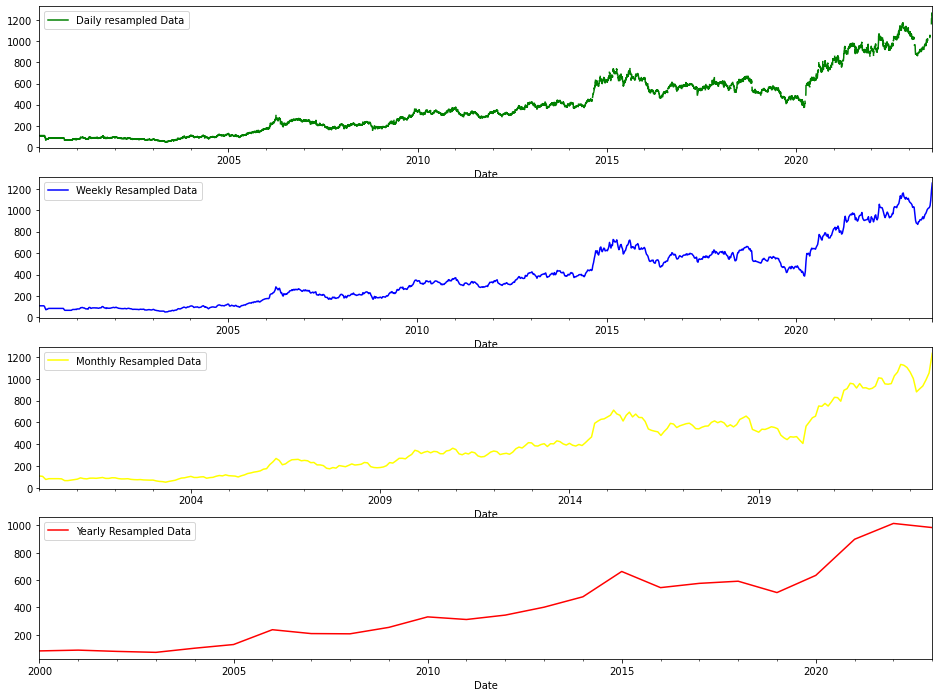

In [16]:
## Resampling the data
daily_resampled=CIPLA_data['Close'].resample('D').mean()
weekly_resampled=CIPLA_data['Close'].resample('W').mean()
monthly_resampled=CIPLA_data['Close'].resample('M').mean()
yearly_resampled=CIPLA_data['Close'].resample('A').mean()


plt.figure(figsize=(16,12))
plt.subplot(4,1,1)
daily_resampled.plot(color='green')
plt.legend(['Daily resampled Data'])

plt.subplot(4,1,2)
weekly_resampled.plot(color='blue')
plt.legend(['Weekly Resampled Data'])

plt.subplot(4,1,3)
monthly_resampled.plot(color='yellow')
plt.legend(['Monthly Resampled Data'])


plt.subplot(4,1,4)
yearly_resampled.plot(color='red')
plt.legend(['Yearly Resampled Data'])

plt.show()

# Visualization Rolling Function

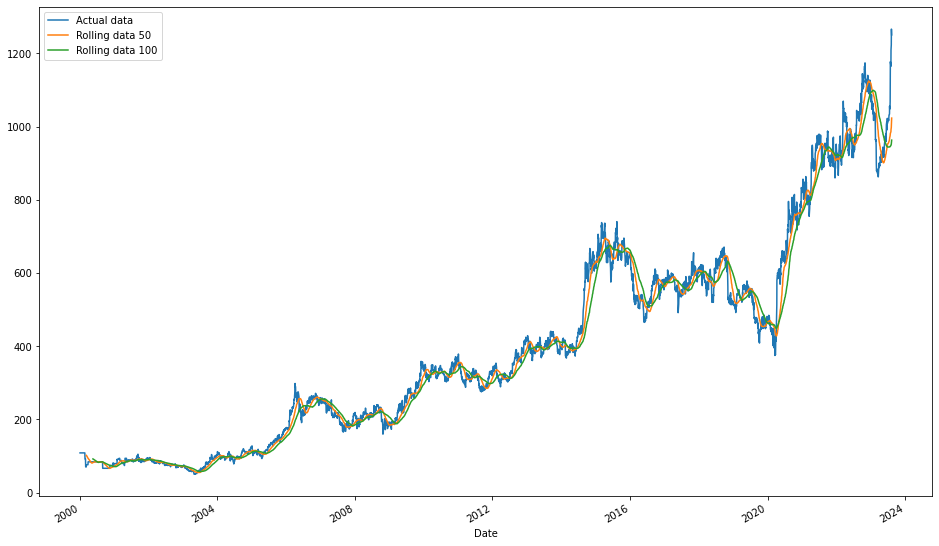

In [17]:
## Using the rolling function to smoothen the curve
data_rolling_10=CIPLA_data['Close'].rolling(10).mean() ## rolling by 10 days
data_rolling_50=CIPLA_data['Close'].rolling(50).mean() # rolling by 50 days
data_rolling_100=CIPLA_data['Close'].rolling(100).mean() # rolling by 100 days

plt.figure(figsize=(16,10))
CIPLA_data.Close.plot(label="Actual data")
#data_rolling_10.plot(label="Rolling data 10")
data_rolling_50.plot(label="Rolling data 50")
data_rolling_100.plot(label="Rolling data 100")
plt.legend()
plt.show()

## To Check Stationarity Time Series

The Augmented Dickey-Fuller (ADF) test is a statistical test used to determine whether a given time series is stationary or non-stationary. Stationarity is an important concept in time series analysis, as it ensures that the statistical properties of the time series remain constant over time. Non-stationary time series may have trends, seasonality, or other changing statistical properties that can make forecasting and analysis more challenging.

* The null hypothesis of the ADF test is that the time series has a unit root, indicating that it is non-stationary.
* The alternative hypothesis is that the time series is stationary.

The ADF test produces a test statistic and a p-value. The p-value indicates the probability of observing the test statistic if the null hypothesis is true.

If the p-value is below a chosen significance level (commonly 0.05), then we reject the null hypothesis and conclude that the time series is stationary. If the p-value is above the significance level, we fail to reject the null hypothesis, suggesting that the time series is non-stationary.

In [18]:
from statsmodels.tsa.stattools import adfuller

adfuller_result=adfuller(CIPLA_data['Close'])
print(f'ADF test Statistic: {adfuller_result[0]}')
print(f'p-value: {adfuller_result[1]}')

ADF test Statistic: 0.8573634580035147
p-value: 0.9925079017022668


As We can see p-value is greater than 0.05, it means that the data is not stationary

# <center>--------------Decompisition of Time Series--------------- </cneter>

Any time series distribution has 3 core components:

1. Seasonality - does the data have a clear cyclical/periodic pattern?
2. Trend - does the data represent a general upward or downward slope?
3. Noise - what are the outliers or missing values that are not consistent with the rest of the data?

Deconstructing a time series into these components is called decomposition

### Basic Structures
The following two structures are considered for basic decomposition models:

* Additive:
    = Trend + Seasonal + Random
* Multiplicative:
    = Trend * Seasonal * Random

The “Random” term is often called “Irregular” in software for decompositions.

</br>

#### How to Choose Between Additive and Multiplicative Decompositions

* The additive model is useful when the seasonal variation is relatively constant over time.
* The multiplicative model is useful when the seasonal variation increases over time.

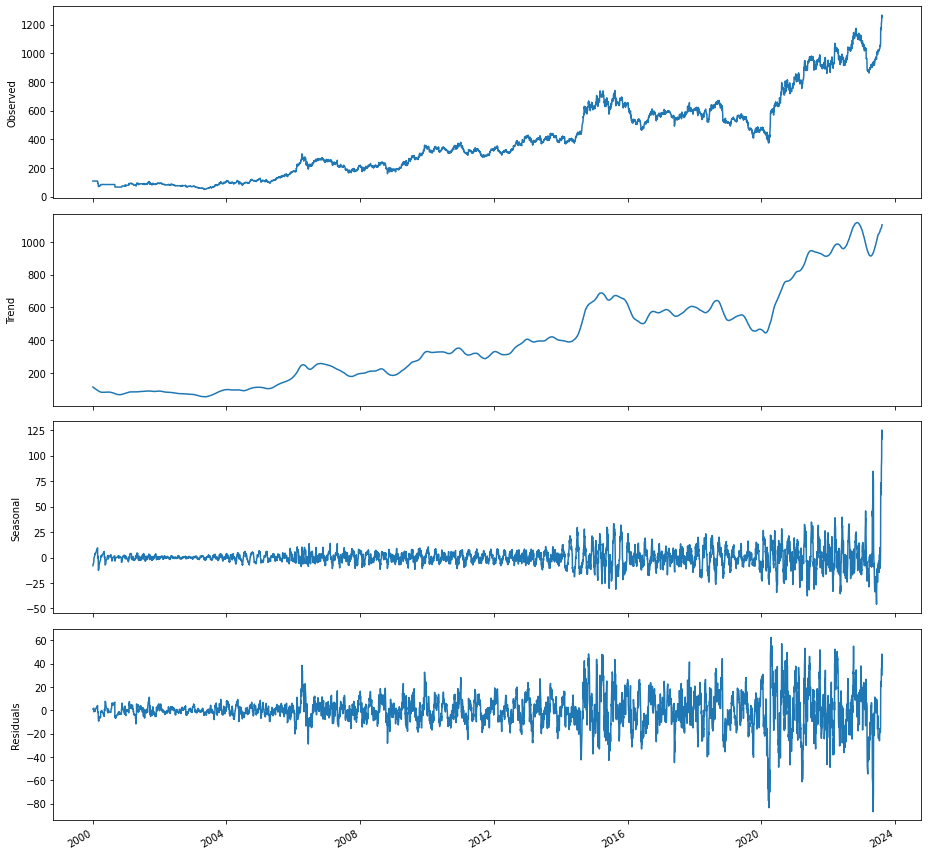

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL

advanced_decomposition = STL(CIPLA_data['Close'], period = 52).fit()
# Here period is for seasonal decomposition (By specifying a period of 52, indicating that the data has a seasonal pattern that repeats every 52 data points)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True,figsize=(13, 12))

ax1.plot(advanced_decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(advanced_decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(advanced_decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(advanced_decomposition.resid)
ax4.set_ylabel('Residuals')


fig.autofmt_xdate()
plt.tight_layout()




# Plotting PACF AND ACF plots

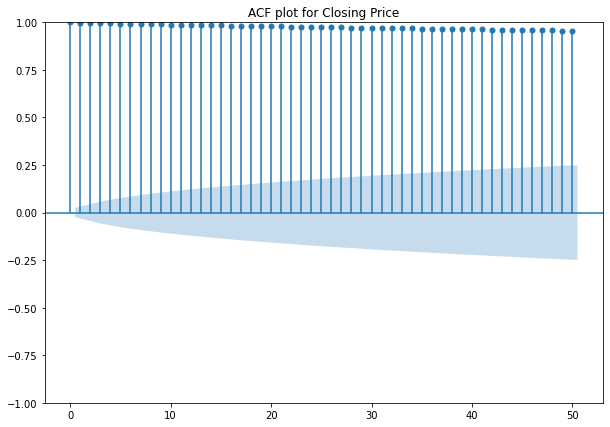

In [25]:
## Plotting the pacf and acf for the non stationary data

  # Adjust the figsize as needed
fig, ax = plt.subplots(figsize=(10, 7))
plot_acf(CIPLA_data['Close'], lags=50,ax=ax)
plt.title('ACF plot for Closing Price')
plt.show()

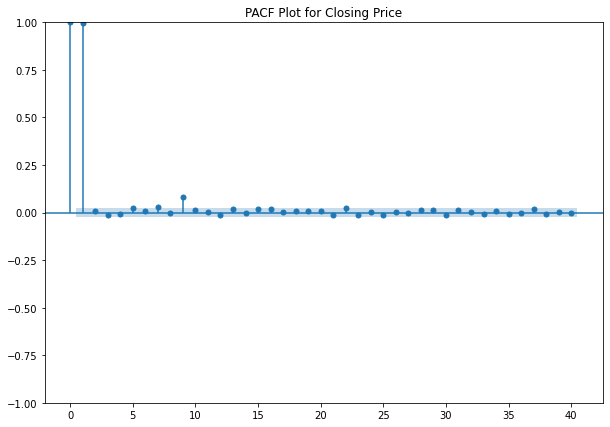

In [24]:
fig, ax = plt.subplots(figsize=(10, 7))
plot_pacf(CIPLA_data['Close'],lags=40,ax=ax)
plt.title('PACF Plot for Closing Price')
plt.show()

# Differencing

In [26]:
## Differencing the values
CIPLA_data_1_dif=CIPLA_data.copy()
CIPLA_data_1_dif['Close_1_dif']=CIPLA_data_1_dif['Close']-CIPLA_data_1_dif['Close'].shift(1)
CIPLA_data_1_dif.shape

(5873, 7)

In [27]:
CIPLA_data_1_dif.head(10)

Open        High         Low       Close  Adj Close  Volume  \
Date                                                                            
2000-01-03  108.399994  108.399994  108.399994  108.399994  64.869507       0   
2000-01-04  108.399994  108.399994  108.399994  108.399994  64.869507       0   
2000-01-05  108.399994  108.399994  108.399994  108.399994  64.869507       0   
2000-01-06  108.399994  108.399994  108.399994  108.399994  64.869507       0   
2000-01-07  108.399994  108.399994  108.399994  108.399994  64.869507       0   
2000-01-10  108.399994  108.399994  108.399994  108.399994  64.869507       0   
2000-01-11  108.399994  108.399994  108.399994  108.399994  64.869507       0   
2000-01-12  108.399994  108.399994  108.399994  108.399994  64.869507       0   
2000-01-13  108.399994  108.399994  108.399994  108.399994  64.869507       0   
2000-01-14  108.399994  108.399994  108.399994  108.399994  64.869507       0   

            Close_1_dif  
Date                     
2000-01-03          NaN  
2000-01-04          0.0  
2000-01-05          0.0  
2000-01-06          0.0  
2000-01-07          0.0  
2000-01-10          0.0  
2000-01-11          0.0  
2000-01-12          0.0  
2000-01-13          0.0  
2000-01-14          0.0

In [28]:
# Now again Checking for Stationarity after the Differencing
adfuller_result_1_dif=adfuller(CIPLA_data_1_dif['Close_1_dif'][1:])
print(f'ADF test Statistic: {adfuller_result_1_dif[0]}')
print(f'p-value: {adfuller_result_1_dif[1]}')


ADF test Statistic: -12.686236464254446
p-value: 1.158016130890816e-23


Since now p-value is less than 0.05, means the Data is stationary after the first differencing

<AxesSubplot:xlabel='Date'>

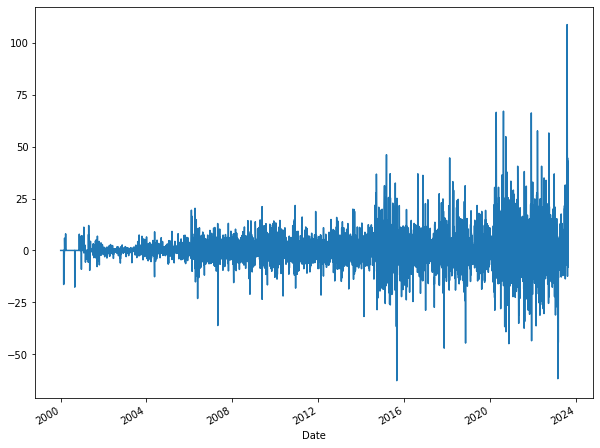

In [30]:
CIPLA_data_1_dif['Close_1_dif'][1:].plot(figsize=(10,8))

As we can see that there is no trend or seasonality.. and also the data is around constant mean and variance

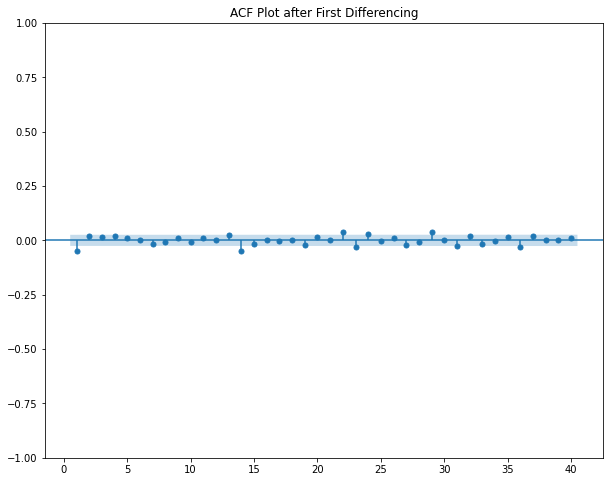

In [31]:
fig, ax = plt.subplots(figsize=(10, 8))
plot_acf(CIPLA_data_1_dif['Close_1_dif'][1:],lags=40,zero=False,ax=ax)
plt.title("ACF Plot after First Differencing")
plt.show()

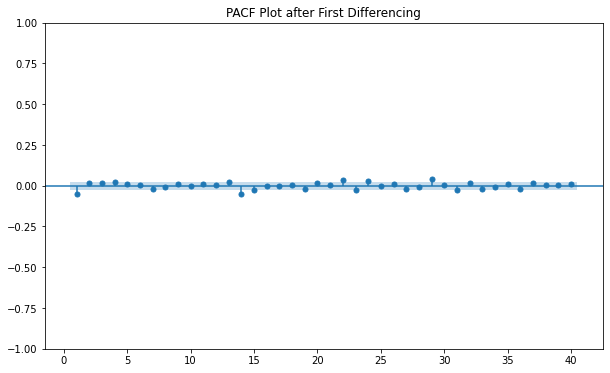

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(CIPLA_data_1_dif['Close_1_dif'][1:],lags=40,zero=False,ax=ax)
plt.title("PACF Plot after First Differencing")
plt.show()

# Splitting the Data in Training and Test set

In [33]:
length=0.8
limit=int(CIPLA_data_1_dif.shape[0]*length)
train=CIPLA_data_1_dif.iloc[0:limit,:]
test=CIPLA_data_1_dif.iloc[limit:,:]

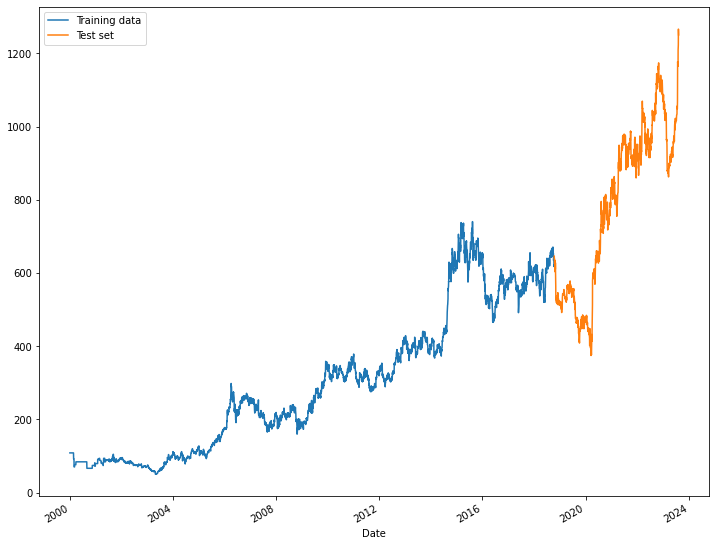

In [34]:
plt.figure(figsize=(12,10))
train['Close'].plot(label='Training data')
test['Close'].plot(label='Test set')
plt.legend()
plt.show()

# Finding Best Parameters for ARIMA model


In [35]:
from statsmodels.tsa.arima.model import ARIMA

best_order=(0,0,0)

best_aic=np.inf
for p in range(0,5):
    for q in range(0,5):
        model=ARIMA(train['Close_1_dif'],order=(p,1,q))
        result=model.fit()

        current_aic=result.aic
        if(best_aic>current_aic):
              best_aic=current_aic
              best_order=(p,1,q)


In [41]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import pandas as pd

# Assuming you have 'train' DataFrame with 'Close_1_dif' column

best_order = (0, 0, 0)
best_aic = np.inf

for p in range(0, 5):
    for q in range(0, 5):
        model = ARIMA(train['Close_1_dif'], order=(p, 1, q))
        result = model.fit()

        current_aic = result.aic
        if best_aic > current_aic:
            best_aic = current_aic
            best_order = (p, 1, q)

print("Best AIC:", best_aic)
print("Best Order (p, d, q):", best_order)


Best AIC: 29886.880453661364
Best Order (p, d, q): (4, 1, 4)


In [42]:
best_model=ARIMA(train['Close'][1:],order=best_order)
result=best_model.fit()

In [43]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 4697
Model:                 ARIMA(4, 1, 4)   Log Likelihood              -14918.959
Date:                Mon, 14 Aug 2023   AIC                          29855.919
Time:                        00:41:58   BIC                          29914.009
Sample:                             0   HQIC                         29876.343
                               - 4697                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1437      0.106      1.362      0.173      -0.063       0.351
ar.L2         -0.6119      0.096     -6.369      0.000      -0.800      -0.424
ar.L3          0.2773      0.087      3.180      0.001       0.106       0.448
ar.L4         -0.7033      0.087     -8.039      0.000      -0.875      -0.532
ma.L1         -0.1584      0.103     -1.538      0.124      -0.360       0.043
ma.L2          0.5960      0.093      6.442      0.000       0.415       0.777
ma.L3         -0.2932      0.083     -3.553      0.000      -0.455      -0.131
ma.L4          0.7367      0.084      8.774      0.000       0.572       0.901
sigma2        34.0155      0.316    107.757      0.000      33.397      34.634
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             20413.43
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              18.90   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

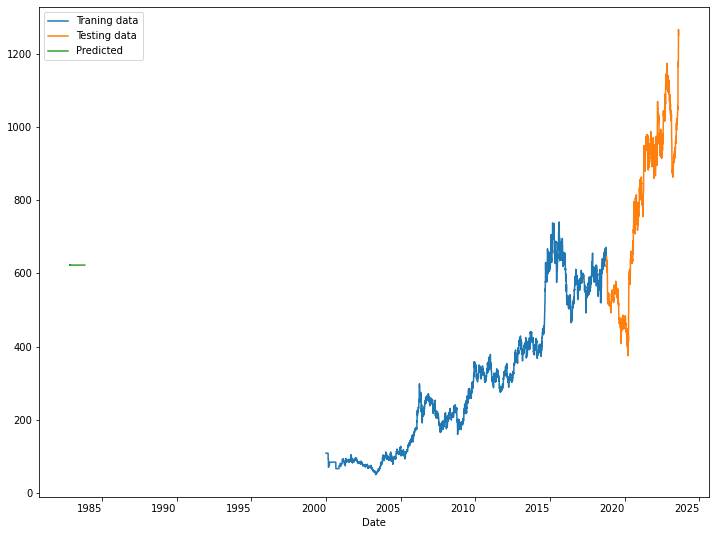

In [47]:
predicted=result.forecast(steps=365)
plt.figure(figsize=(12,10))
train['Close'].plot(label='Traning data')
test['Close'].plot(label='Testing data')
predicted.plot(label='Predicted')
plt.legend()
plt.show()

# ARIMA on Weekly Data

In [48]:
CIPLA_weekly_data=CIPLA_data.copy()
CIPLA_weekly_data=CIPLA_weekly_data.resample('W').mean()

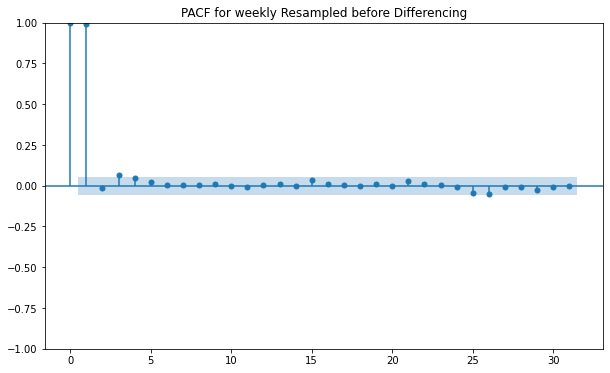

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(CIPLA_weekly_data['Close'],ax=ax)
plt.title("PACF for weekly Resampled before Differencing")
plt.show()

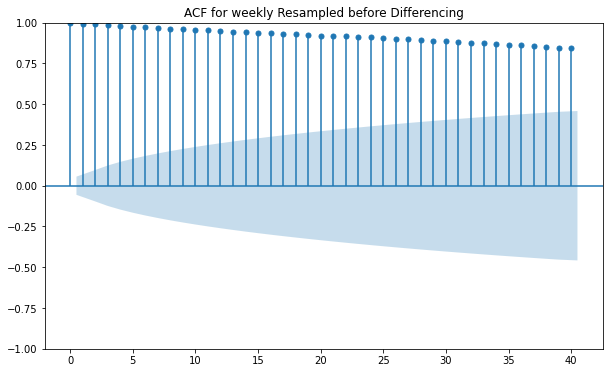

In [50]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(weekly_resampled,lags=40,ax=ax)
plt.title("ACF for weekly Resampled before Differencing")
plt.show()

In [51]:
adfuller_result=adfuller(CIPLA_weekly_data['Close'])
print(f'ADF test Statistic: {adfuller_result[0]}')
print(f'p-value: {adfuller_result[1]}')

ADF test Statistic: 1.0309549601347456
p-value: 0.9945820559382056


In [52]:
CIPLA_weekly_data['Close_1_dif']=CIPLA_weekly_data['Close']-CIPLA_weekly_data['Close'].shift(1)
CIPLA_weekly_data.shape

(1232, 7)

In [53]:
adfuller_result_1_dif=adfuller(CIPLA_weekly_data['Close_1_dif'][1:])
print(f'ADF test Statistic: {adfuller_result_1_dif[0]}')
print(f'p-value: {adfuller_result_1_dif[1]}')


ADF test Statistic: -7.476697768445323
p-value: 4.8923336820182656e-11


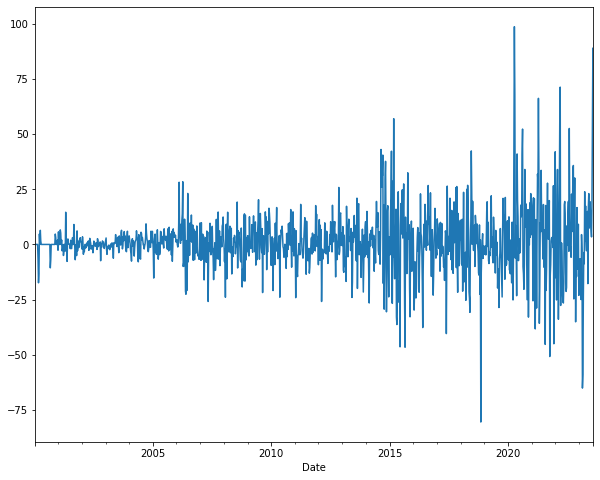

In [55]:
CIPLA_weekly_data['Close_1_dif'][1:].plot(figsize=(10,8))
plt.show()

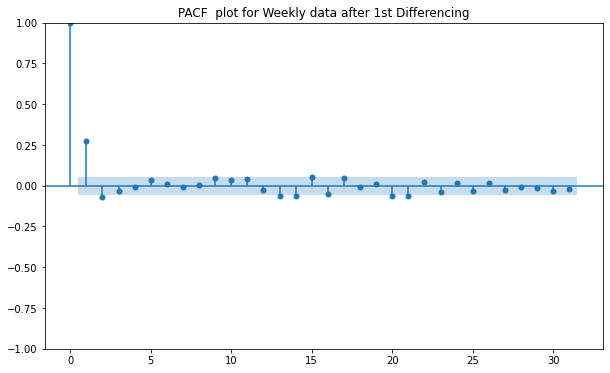

In [56]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(CIPLA_weekly_data['Close_1_dif'][1:],ax=ax)
plt.title('PACF  plot for Weekly data after 1st Differencing')
plt.show()

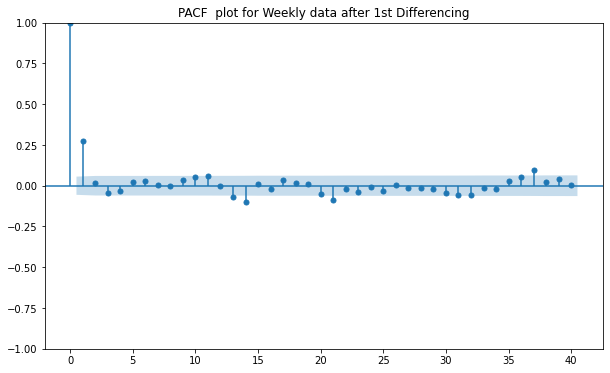

In [57]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(CIPLA_weekly_data['Close_1_dif'][1:],lags=40,ax=ax)
plt.title('PACF  plot for Weekly data after 1st Differencing')
plt.show()

In [58]:
length=0.8
limit=int(CIPLA_weekly_data.shape[0]*length)
train=CIPLA_weekly_data.iloc[0:limit,:]
test=CIPLA_weekly_data.iloc[limit:,:]

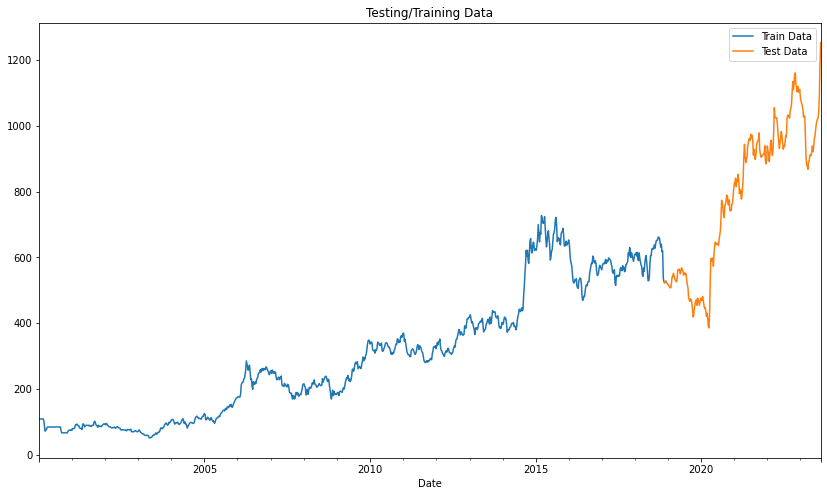

In [62]:
train['Close'].plot(figsize=(14,8),label='Train Data')
test['Close'].plot(label='Test Data')
plt.title('Testing/Training Data')
plt.legend()
plt.show()

In [63]:
from statsmodels.tsa.arima.model import ARIMA

best_order=(0,0,0)

best_aic=np.inf
for p in range(0,7):
  for q in range(0,7):
    model=ARIMA(train['Close_1_dif'],order=(p,1,q))
    result=model.fit()

    current_aic=result.aic
    if(best_aic>current_aic):
      best_aic=current_aic
      best_order=(p,1,q)


In [64]:
best_order

(0, 1, 2)

In [65]:
best_model=ARIMA(train['Close'][1:],order=best_order)
result=best_model.fit()

In [66]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  984
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -3702.080
Date:                Mon, 14 Aug 2023   AIC                           7410.161
Time:                        00:50:38   BIC                           7424.833
Sample:                    01-16-2000   HQIC                          7415.742
                         - 11-18-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1850      0.022      8.264      0.000       0.141       0.229
ma.L2          0.0026      0.021      0.127      0.899      -0.038       0.043
sigma2       109.3210      2.554     42.807      0.000     104.316     114.326
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1960.14
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              13.30   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

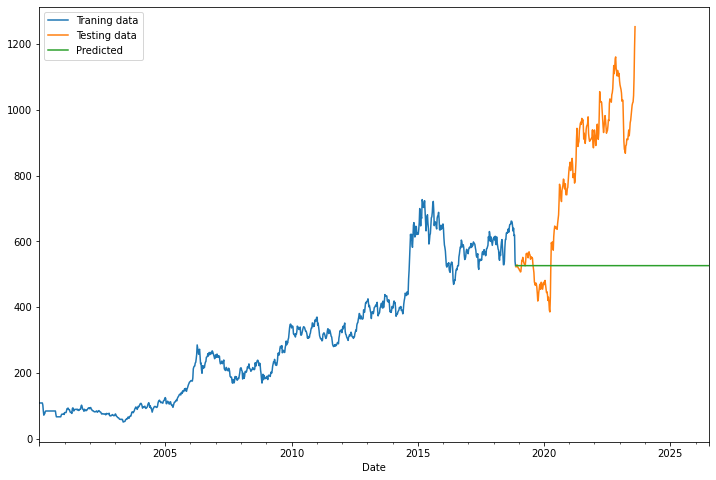

In [67]:
predicted=result.forecast(steps=400)
train['Close'].plot(label='Traning data',figsize=(12,8))
test['Close'].plot(label='Testing data')
predicted.plot(label='Predicted')
plt.legend()
plt.show()

# LSTM MODEL PREDICTION

1. Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies.


2. LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn like RNNs!


3. All recurrent neural networks have the form of a chain of repeating modules of neural network. In standard RNNs, this repeating module will have a very simple structure, such as a single tanh layer.
Also, they don't suffer from problems like vanishing/exploding gradient descent.

In [68]:
CIPLA_data=yfinance.download('CIPLA.BO')

[*********************100%***********************]  1 of 1 completed


In [69]:
data=CIPLA_data.copy()
data.head()

Open        High         Low       Close  Adj Close  Volume
Date                                                                         
2000-01-03  108.399994  108.399994  108.399994  108.399994  64.869507       0
2000-01-04  108.399994  108.399994  108.399994  108.399994  64.869507       0
2000-01-05  108.399994  108.399994  108.399994  108.399994  64.869507       0
2000-01-06  108.399994  108.399994  108.399994  108.399994  64.869507       0
2000-01-07  108.399994  108.399994  108.399994  108.399994  64.869507       0

In [70]:
data.drop(columns=['Open','High','Low','Adj Close','Volume'],inplace=True) ## Dropping the other columns which are not in use

In [71]:
data.head() ## Top 5 rows

Close
Date                  
2000-01-03  108.399994
2000-01-04  108.399994
2000-01-05  108.399994
2000-01-06  108.399994
2000-01-07  108.399994

In [72]:
from statsmodels.tsa.stattools import adfuller
## Using Adfuller test on the Data to check for stationarity
result=adfuller(data)
result

(0.8573634580035147,
 0.9925079017022668,
 31,
 5841,
 {'1%': -3.431470043853999,
  '5%': -2.862034953954713,
  '10%': -2.5670334618919366},
 40700.04440562473)

Since p-value is greater than 0.05 , it means the data is not stationary

In [73]:
length=0.8
limit=int(data.shape[0]*length)

## Splitting the data in Training and testing
train=data.iloc[0:limit,:]
test=data.iloc[limit:,:]

In [74]:
training_set = train.values
training_set = np.reshape(training_set, (len(training_set), 1))
## Applying Min Max Scaler to Scale the values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [75]:
# Importing the usable Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation


model = Sequential()
# Applying First LSTM layer and some Dropout layers to avoid Overfitting
model.add(LSTM(128,activation="sigmoid",input_shape=(1,1)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=2)

Epoch 1/100
94/94 - 5s - loss: 0.1034 - 5s/epoch - 51ms/step
Epoch 2/100
94/94 - 1s - loss: 0.0743 - 516ms/epoch - 5ms/step
Epoch 3/100
94/94 - 1s - loss: 0.0598 - 520ms/epoch - 6ms/step
Epoch 4/100
94/94 - 1s - loss: 0.0487 - 519ms/epoch - 6ms/step
Epoch 5/100
94/94 - 1s - loss: 0.0388 - 513ms/epoch - 5ms/step
Epoch 6/100
94/94 - 1s - loss: 0.0312 - 508ms/epoch - 5ms/step
Epoch 7/100
94/94 - 1s - loss: 0.0270 - 524ms/epoch - 6ms/step
Epoch 8/100
94/94 - 1s - loss: 0.0224 - 514ms/epoch - 5ms/step
Epoch 9/100
94/94 - 1s - loss: 0.0185 - 512ms/epoch - 5ms/step
Epoch 10/100
94/94 - 1s - loss: 0.0175 - 520ms/epoch - 6ms/step
Epoch 11/100
94/94 - 1s - loss: 0.0159 - 522ms/epoch - 6ms/step
Epoch 12/100
94/94 - 1s - loss: 0.0137 - 511ms/epoch - 5ms/step
Epoch 13/100
94/94 - 1s - loss: 0.0127 - 514ms/epoch - 5ms/step
Epoch 14/100
94/94 - 1s - loss: 0.0117 - 515ms/epoch - 5ms/step
Epoch 15/100
94/94 - 1s - loss: 0.0112 - 510ms/epoch - 5ms/step
Epoch 16/100
94/94 - 1s - loss: 0.0104 - 514ms/epoc

In [151]:
model.summary() ## Model Summary

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 66689 (260.50 KB)
Trainable params: 66689 (260.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
# Making the predictions
test_set = test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_CIPLA_price = model.predict(inputs) # Predicting the Closing price based on the time intervals of Test data
predicted_CIPLA_price = sc.inverse_transform(predicted_CIPLA_price) # Inversing the scaled values back to normal form

37/37 [==============================] - 1s 3ms/step


In [77]:
test['Prediction'] = predicted_CIPLA_price
data_all_lstm = pd.concat([test, train], sort=False)

<AxesSubplot:xlabel='Date'>

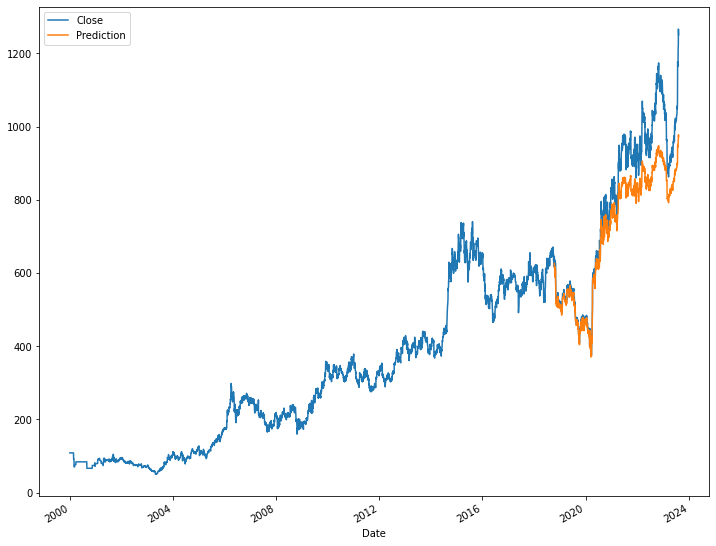

In [78]:

data_all_lstm[['Close','Prediction']].plot(figsize=(12,10)) ## Visualizing Predicted values

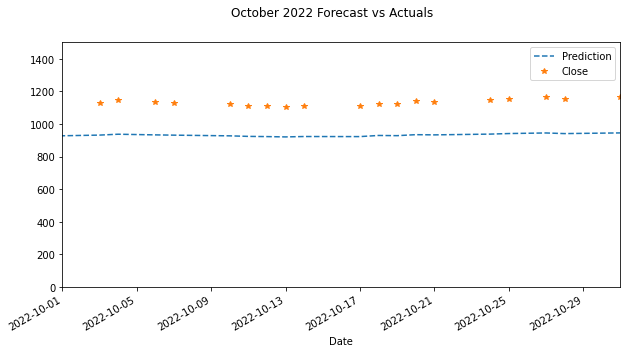

In [79]:
# Plot the forecast with the actuals of the October month 2022
f, ax = plt.subplots(1,figsize=(10,5))
data_all_lstm[['Prediction','Close']].plot(ax=ax,style=['--','*'])
ax.set_xbound(lower='10-01-2022', upper='10-31-2022')
ax.set_ylim(0, 1500)
plot = plt.suptitle('October 2022 Forecast vs Actuals')

In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Mean Squared Error" ,mean_squared_error(y_true=test['Close'],
                   y_pred=test['Prediction']))

Mean Squared Error 8145.596951540287


In [81]:
print("Mean Absolute Error" ,mean_absolute_error(y_true=test['Close'],
                   y_pred=test['Prediction']))

Mean Absolute Error 68.65505726915725


# Time Series forecasting with XGBoost

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance. XGBoost is a powerful and versatile tool. Lets see, How well does XGBoost perform when used to predict future values of a time-series like Bitcoin prices ?

In [82]:
from sklearn import ensemble
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from xgboost import plot_tree,plot_importance
from sklearn.metrics import mean_squared_error,mean_absolute_error
from datetime import datetime
import yfinance
import warnings
warnings.filterwarnings('ignore')

In [83]:
CIPLA_data=yfinance.download('CIPLA.BO')

[*********************100%***********************]  1 of 1 completed


For the Sake of Simplicity we will work on the CLose Price

In [84]:
data=CIPLA_data.copy()
# data=data.resample('W').mean()
data.drop(columns=['Open','High','Low','Adj Close','Volume'],inplace=True) # Dropping the other columns which are not in use

In [85]:
limit=int(0.8*data.shape[0])
# Splitting the data in train and test data
train_data=data.iloc[0:limit,:]
test_data=data.iloc[limit:,:]

<AxesSubplot:title={'center':' Daily Closing Price '}, xlabel='Date'>

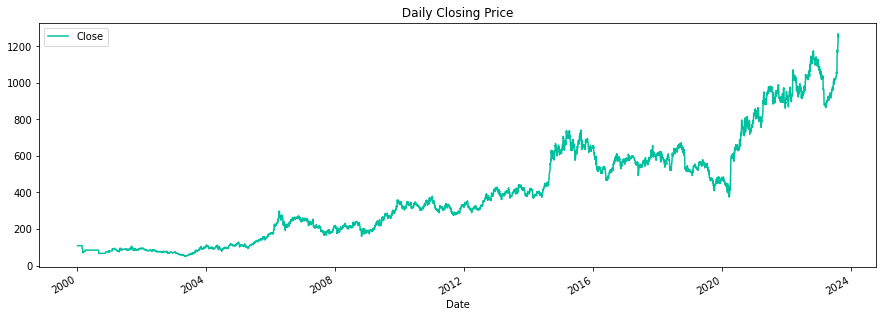

In [86]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"] ## Some color codes
data.plot(style='', figsize=(15,5), color=color_pal[4], title=' Daily Closing Price ') # Plotting the Closinig price

In [87]:
def create_features(data,label=None):
    ## Creating new Features from the Time stamp
    data['Year'] = data.index.year
    data['Month'] = data.index.month
    data['Day'] = data.index.day

    X = data[['Year','Month','Day']]
    y=data['Close']
    return X,y

In [88]:
# Creating new features of Training and test Data seperately
X_train,y_train=create_features(train_data, label='Close')
X_test,y_test=create_features(test_data, label='Close')

In [89]:
## Building XG regressor model
xgboost_model =  xgb.XGBRegressor(objective ='reg:linear',min_child_weight=10, booster='gbtree', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 800)
xgboost_model.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=20,
       verbose=False) # Change verbose to True if you want to see it train

[00:53:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             n_estimators=800, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', ...)

In [90]:
test_data['Prediction'] = xgboost_model.predict(X_test) ## Predicting the values from the test data
data_all_xgboost = pd.concat([train_data, test_data], sort=False)

In [91]:
data_all_xgboost.tail()

Close  Year  Month  Day  Prediction
Date                                                 
2023-08-07  1223.550049  2023      8    7  610.362122
2023-08-08  1266.599976  2023      8    8  612.824768
2023-08-09  1265.900024  2023      8    9  610.057556
2023-08-10  1258.800049  2023      8   10  611.940796
2023-08-11  1250.699951  2023      8   11  609.371765

<AxesSubplot:xlabel='Date'>

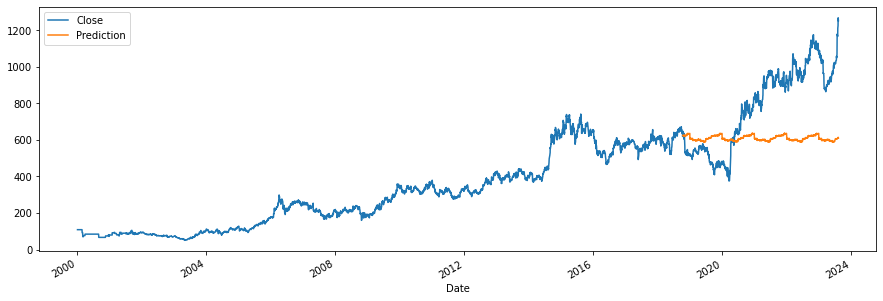

In [93]:
data_all_xgboost[['Close','Prediction']].plot(figsize=(15, 5))

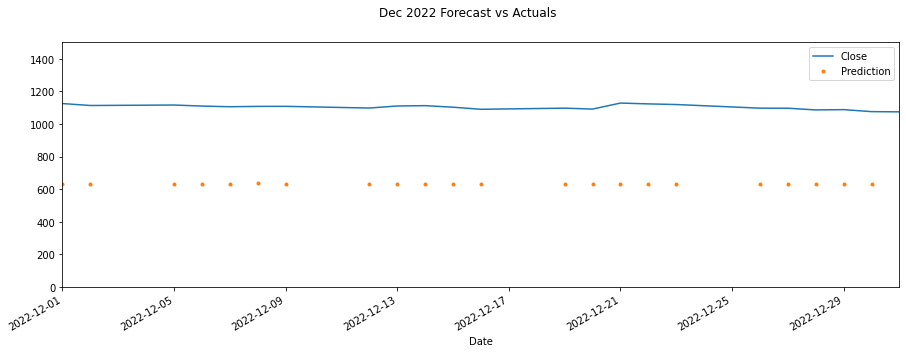

In [94]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
data_all_xgboost[['Close','Prediction']].plot(ax=ax,style=['-','.'])
ax.set_xbound(lower='12-01-2022', upper='12-31-2022')
ax.set_ylim(0, 1500)
plot = plt.suptitle('Dec 2022 Forecast vs Actuals')

In [95]:
print('Mean Squared Model using XGBoost',mean_squared_error(y_true=test_data['Close'],
                   y_pred=test_data['Prediction']))

Mean Squared Model using XGBoost 78669.02256340314


In [96]:
print('Mean Absolute Error using XGBoost Model',mean_absolute_error(y_true=test_data['Close'],
                   y_pred=test_data['Prediction']))

Mean Absolute Error using XGBoost Model 239.6000559965093


# Comparing Different Models

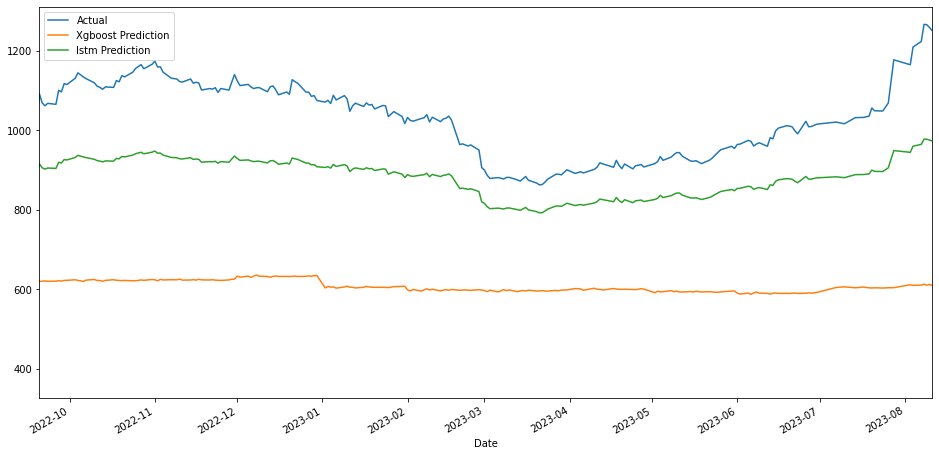

In [97]:
plt.figure(figsize=(16,8))
test_data['Close'].plot(label='Actual')
data_all_xgboost['Prediction'].plot(label='Xgboost Prediction')
data_all_lstm['Prediction'].plot(label='lstm Prediction')
plt.xlim('2022-09-20','2023-08-11')
plt.legend()
plt.show()

## Future Price Prediction using XGBoost

[00:55:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "objectibe" } are not used.

[0]	validation_0-rmse:474.86117
[100]	validation_0-rmse:181.53180
[200]	validation_0-rmse:79.25449
[300]	validation_0-rmse:47.21633
[400]	validation_0-rmse:37.62050
[500]	validation_0-rmse:34.02255
[600]	validation_0-rmse:32.66838
[700]	validation_0-rmse:31.79040
[800]	validation_0-rmse:30.84999
[900]	validation_0-rmse:29.66272
[1000]	validation_0-rmse:28.99584
[1100]	validation_0-rmse:28.28140
[1200]	validation_0-rmse:27.63000
[1300]	validation_0-rmse:27.05775
[1400]	validation_0-rmse:26.42917
[1499]	validation_0-rmse:25.76009


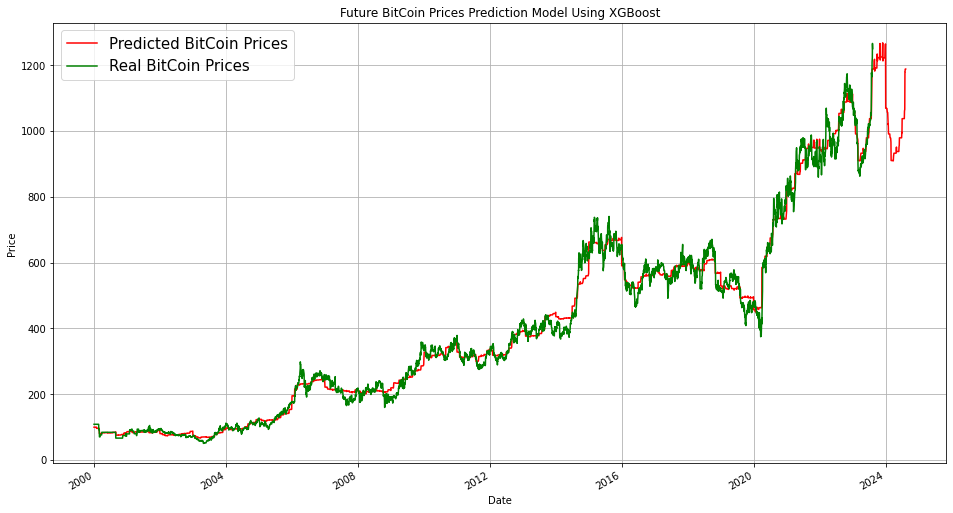

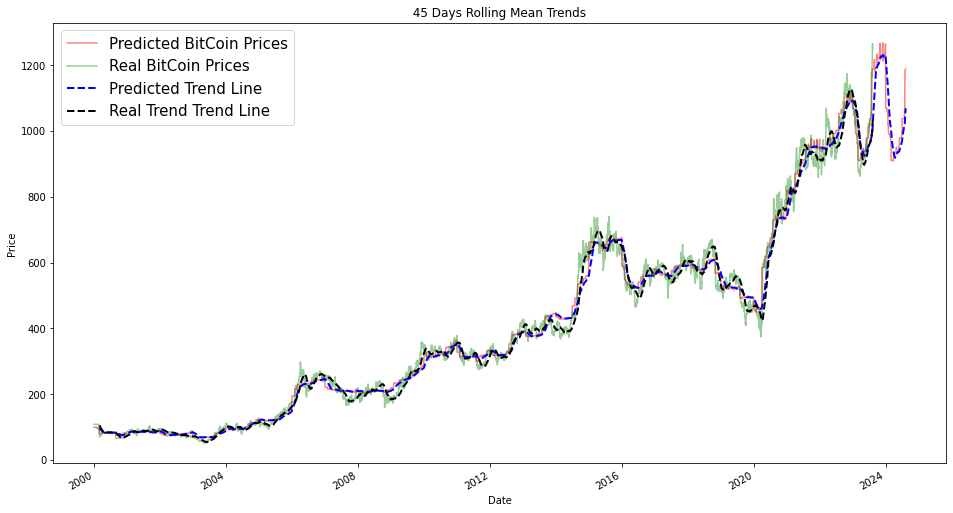

In [98]:
def create_features(data):
    data['Year'] = data.index.year
    data['Month'] = data.index.month
    data['Day'] = data.index.day
    return data   

data = create_features(data)
Features = ['Year', 'Month', 'Day']
Target = "Close"

X_all= data[Features]
Y_all = data[Target]

reg = xgb.XGBRegressor(base_score = 0.5,
                      booster = 'gbtree',
                      n_estimators = 1500,
                      early_stopping_rounds=20,
                      objectibe='reg:linear',
                      max_depth=3,
                      learning_rate = 0.01)

reg.fit(X_all,Y_all,eval_set = [(X_all,Y_all)],verbose=100)
data_final = data.copy()
num_days = 365
future_timestamps = pd.date_range(start=data_final.index[-1] + pd.Timedelta(days=1), periods=num_days,closed='right')
future_data = pd.DataFrame(index=future_timestamps)
future_data['isFuture'] =True
data['isFuture'] = False

data_and_Future = pd.concat([data,future_data])
data_and_Future = create_features(data_and_Future)

lags = [10,20,30] 

def add_lags(lags,data):
    for lag in lags:
        data['lag{}'.format(lag)] = data.index-pd.Timedelta('{} days'.format(lag))
    return data

data_and_Future = add_lags(lags,data_and_Future) 

data_w_Feature = data_and_Future.query('isFuture').copy()
data_and_Future['Predict'] = reg.predict(data_and_Future[Features])


fig = go.Figure(data=[
    go.Candlestick(x=CIPLA_data.index, open=CIPLA_data['Open'], high=CIPLA_data['High'], low=CIPLA_data['Low'], close=CIPLA_data['Close'], name="Real Time Bitcoin Prices"),
])

fig.update_layout(
    title='Bitcoin Price Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Bitcoin Price',
    xaxis_rangeslider_visible=False
)
# Show the plot
fig.show()


fig, ax = plt.subplots(figsize=(16, 9))

data_and_Future['Predict'].plot(ax=ax, color='red', label='Predicted BitCoin Prices')
data['Close'].plot(ax=ax, color='green', label='Real BitCoin Prices', style='-', markersize=5)
ax.grid(True)

ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('Future BitCoin Prices Prediction Model Using XGBoost')
ax.legend(fontsize=15)
plt.show()


fig, ax = plt.subplots(figsize=(16, 9))

data_and_Future['Predict'].plot(ax=ax, color='red', label='Predicted BitCoin Prices',alpha=0.5)
data['Close'].plot(ax=ax, color='green', label='Real BitCoin Prices', markersize=5,alpha=0.4)

predicted_trend_line = data_and_Future['Predict'].rolling(window=45).mean()
real_trend_line = data['Close'].rolling(window=45).mean()
predicted_trend_line.plot(ax=ax, color='blue', linestyle='--', linewidth=2,figsize=(16,9),label='Predicted Trend Line')
real_trend_line.plot(ax=ax, color='black', style='--', linewidth=2,label='Real Trend Trend Line')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title(' 45 Days Rolling Mean Trends ')
ax.legend(fontsize=15)
plt.show()